In [6]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.patches import Circle
from scipy.integrate import odeint
from IPython.display import HTML

In [7]:
# Constants
g = 9.81 # gravity (m/s^2)

# Pendulum dimensions
l_1 = 1 # rod length (m)
l_c1 = 0.5 # distance along rod to center of mass (m)

r = 0.05 # radius of reaction wheel (m)

m_1 = 0.5 # mass of rod (kg)
m_2 = 2 # mass of reaction wheel (kg)

I_c1 = 1/12 * m_1 * l_1**2 # moment of inertia of rod about center of mass (kg m^2)
I_c2 = 1/2 * m_2 * r**2 # moment of inertia of reaction wheel about center of mass (kg m^2)

# Torques
tau_1 = 0
# tau_2 = -20

In [8]:
def deriv(q: npt.NDArray[np.float64], t: npt.NDArray[np.float64]) -> tuple[float, float, float, float]:
    theta_1, theta_1d, theta_2, theta_2d = q
    c1 = np.cos(theta_1)
    
    tau_2 = -g * (l_1 * m_2 + l_c1 * m_1) * np.cos(theta_1)

    theta_1d: float = theta_1d
    theta_1dd: float = ((-g * l_1 * m_2 * c1) - (g * l_c1 * m_1 * c1) + tau_1 - tau_2) / (I_c1 + l_1**2 * m_2 + l_c1**2 * m_1)
    theta_2d: float = theta_2d
    theta_2d_dot: float = ((I_c1 * tau_2) + (I_c2 * g * l_1 * m_2 * c1) + (I_c2 * g * l_c1 * m_1 * c1) - (I_c2 * tau_1) + (I_c2 + l_1**2 * m_2 + l_c1**2 * m_1) * tau_2) / (I_c2 * (I_c1 + l_1**2 * m_2 + l_c1**2 * m_1))

    return theta_1d, theta_1dd, theta_2d, theta_2d_dot

def simulate(
    ts: npt.NDArray[np.float64],
    theta_1: float,
    theta_1d: float,
    theta_2: float,
    theta_2d: float
) -> tuple[npt.NDArray, npt.NDArray, npt.NDArray, npt.NDArray]:
    # Generalized coordinates
    q0 = np.array([theta_1, theta_1d, theta_2, theta_2d])
    q = odeint(deriv, q0, ts)

    theta1, theta2 = q[:, 0], q[:, 2]
    x1 = l_1 * np.cos(theta1)
    y1 = l_1 * np.sin(theta1)
    x2 = x1 + r * np.cos(theta1 + theta2)
    y2 = y1 + r * np.sin(theta1 + theta2)
    return x1, y1, x2, y2


In [9]:
# Define time
tmax, dt = 600, 0.01
t = np.arange(0, tmax + dt, dt)
x1, y1, x2, y2 = simulate(t, 0, 0, 0, 0)

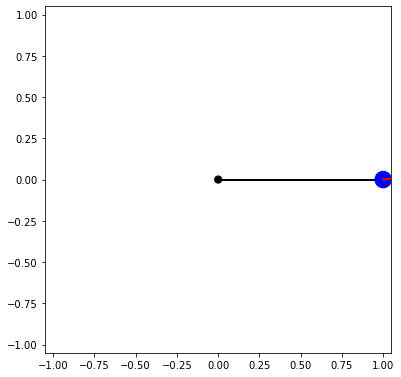

In [10]:
def animate(i: int):
    ax.clear()
    # Plot a frame of the pendulum configuration for timestep i.
    # The pendulum rods.
    ax.plot([0, x1[i]], [0, y1[i]], lw=2, color='k')
    # Circles representing the anchor point and the reaction wheel
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)

    ax.plot([x1[i], x2[i]], [y1[i], y2[i]], lw=2, color='red', zorder=11)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-l_1-r, l_1+r)
    ax.set_ylim(-l_1-r, l_1+r)
    ax.set_aspect('equal', adjustable='box')
    # plt.axis('off')
    # plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
    # plt.cla()

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)
ani = anim.FuncAnimation(fig, animate, frames=tmax, interval=dt * 1000)
HTML(ani.to_jshtml())